## W pdfs by Pope regime and MJO index

This code views the pdfs of vertical velocity generated by dask over the CPOL/Berrima dataset.

In [67]:
from netCDF4 import Dataset
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [71]:
pope_regime = 4
data_path = '/home/rjackson/data/'
mjo_file = []
for mjo_indicies in range(1,9):
    mjo_file.append(data_path + 
                   'wpdfregime' + 
                   str(pope_regime) + 
                   '_MJO' + 
                   str(mjo_indicies) +
                   '_varble.cdf')

regime_names = ['Deep West', 
                'Moist East', 
                'East', 
                'Dry East', 
                'Shallow West']
#regime_names = ['Monsoon', 'Break']
print(mjo_file)

['/home/rjackson/data/wpdfregime4_MJO1_varble.cdf', '/home/rjackson/data/wpdfregime4_MJO2_varble.cdf', '/home/rjackson/data/wpdfregime4_MJO3_varble.cdf', '/home/rjackson/data/wpdfregime4_MJO4_varble.cdf', '/home/rjackson/data/wpdfregime4_MJO5_varble.cdf', '/home/rjackson/data/wpdfregime4_MJO6_varble.cdf', '/home/rjackson/data/wpdfregime4_MJO7_varble.cdf', '/home/rjackson/data/wpdfregime4_MJO8_varble.cdf']


In [69]:
num_levels = 40
mean = np.zeros((num_levels,8))
median = np.zeros((num_levels,8))
ninety = np.zeros((num_levels,8))
ninety_five = np.zeros((num_levels,8))
ninety_nine = np.zeros((num_levels,8))
z = np.zeros(num_levels)
for mjo_indicies in range(0,8):
    try:
        file_cdf = Dataset(mjo_file[mjo_indicies-1], 'r')
        mean[:,mjo_indicies] = file_cdf.variables['mean'][:]
        median[:,mjo_indicies] = file_cdf.variables['median'][:]
        ninety[:,mjo_indicies] = file_cdf.variables['ninety'][:]
        ninety_five[:,mjo_indicies] = file_cdf.variables['ninety_five'][:]
        ninety_nine[:,mjo_indicies] = file_cdf.variables['ninety_nine'][:]
        z = file_cdf.variables['z'][:]
        file_cdf.close()
    except:
        print(('Cant load ' + str(pope_regime)))
    

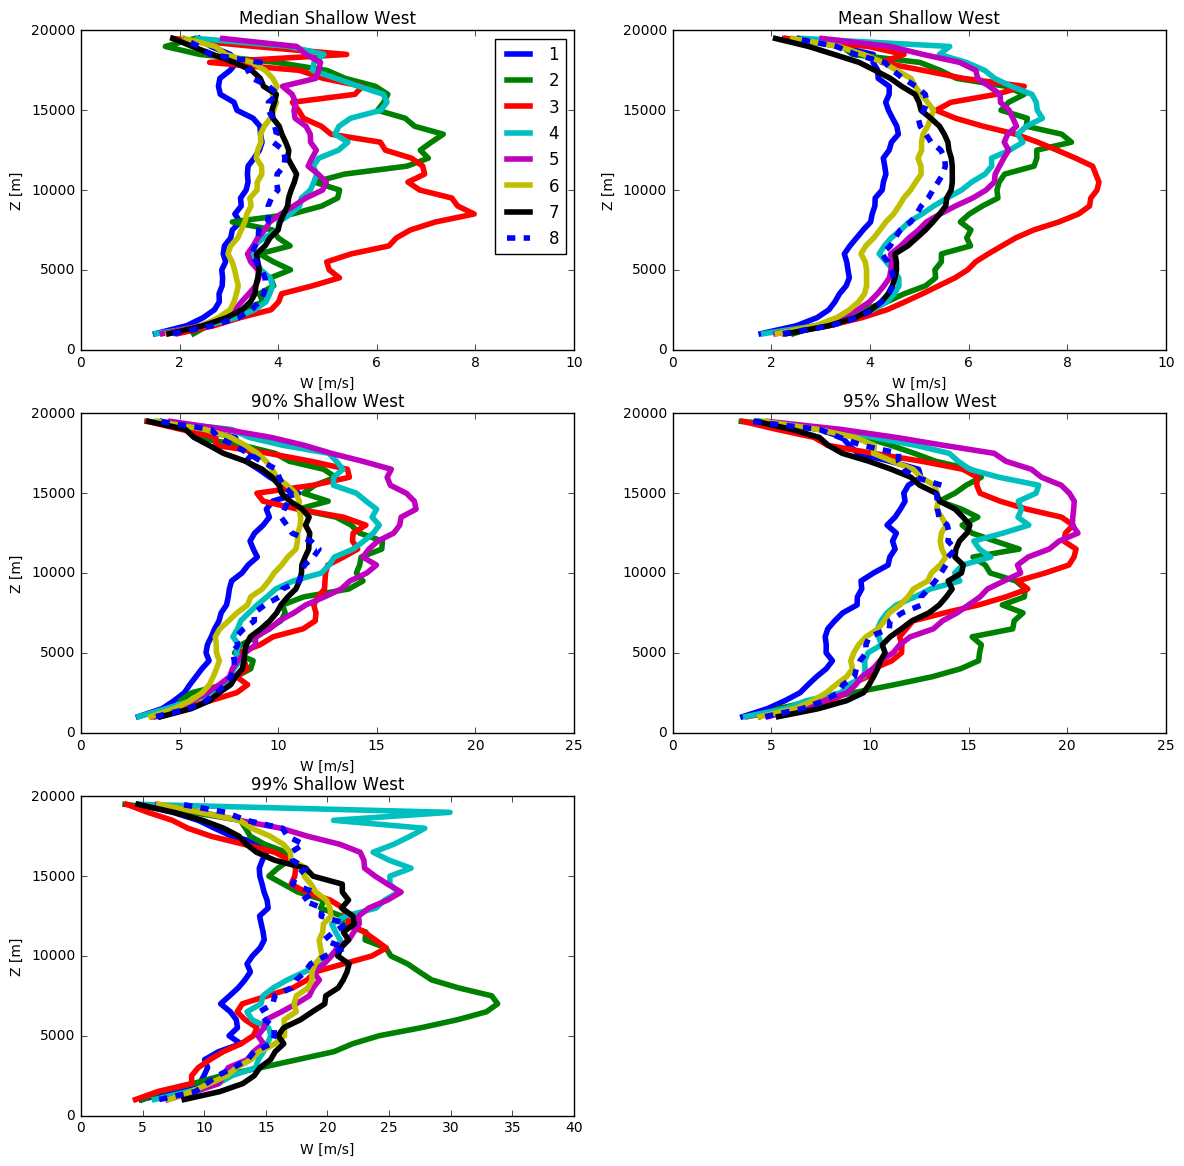

In [70]:
plt.figure(figsize=(14,14))
plt.subplot(321)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(median[:,mjo_indicies], z, linewidth=4)
    else:
        plt.plot(median[:,mjo_indicies], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.legend(['1','2','3','4','5','6','7','8'], loc='best')
plt.xlim([0,10])
plt.title('Median ' + regime_names[pope_regime])
plt.xlabel('W [m/s]')
plt.ylabel('Z [m]')

plt.subplot(322)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(mean[:,mjo_indicies], z, linewidth=4)
    else:
        plt.plot(mean[:,mjo_indicies], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.xlim([0,10])
plt.title('Mean ' + regime_names[pope_regime])
plt.xlabel('W [m/s]')
plt.ylabel('Z [m]')
plt.subplot(323)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(ninety[:,mjo_indicies], z, linewidth=4)
    else:
        plt.plot(ninety[:,mjo_indicies], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.xlim([0,25])
plt.xlabel('W [m/s]')
plt.ylabel('Z [m]')
plt.title('90% ' + regime_names[pope_regime])

plt.subplot(324)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(ninety_five[:,mjo_indicies], 
                 z,
                 linewidth=4)
    else:
        plt.plot(ninety_five[:,mjo_indicies], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.xlim([0,25])

plt.title('95% ' + regime_names[pope_regime])
plt.subplot(325)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(ninety_nine[:,mjo_indicies], 
                 z,
                 linewidth=4)
    else:
        plt.plot(ninety_nine[:,mjo_indicies], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.xlim([0,40])
plt.title('99% ' + regime_names[pope_regime])
plt.xlabel('W [m/s]')
plt.ylabel('Z [m]')